In [26]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt 
from utils.plot_utils import *
from utils.lists import *
import glob
import scipy

In [30]:
results = sorted(glob.glob("/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/LDSC/results_PTSD/*.results"))
names = [r.replace("/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/LDSC/results_PTSD/", "").replace(".peaks.results", "") for r in results]

In [31]:
conditions = []
cell_types = []
for i in names:
    name = i.split(".")
    conditions.append(name[0])
    cell_types.append(name[1])
conditions = sorted(list(set(conditions)))
cell_types = sorted(list(set(cell_types)))
print(conditions)
print(cell_types)

conditions = ['23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913','Schizophrenia','dbGAP_reexperiencing_eur', 'dbGAP_totalPCL_eur','dbGAP_avoidance_eur', 'dbGAP_hyperarousal_eur','dbGAP_CaseControl_eur',
              'Height1','Alcoholism','Alzheimer','IBD','Years_of_Education1','Type_1_Diabetes']

df = np.zeros((len(conditions),len(cell_types)))
vals = []          
for ii,c in enumerate(conditions):
    files = sorted(glob.glob(f'/gpfs/gibbs/pi/girgenti/JZhang/commonData/PTSD/LDSC/results_PTSD/{c}.*.results'))
    for jj,f in enumerate(files):
        zscore = pd.read_csv(f,sep='\t')['Coefficient_z-score'][0]
        mlogpval = -np.log(scipy.stats.norm.sf(abs(zscore)))
        vals.append(mlogpval)
vals = np.array(vals).reshape(len(conditions),len(cell_types))
pval_df = pd.DataFrame(vals,index=conditions,columns=cell_types)

pval_df = pval_df.rename(index={'dbGAP_CaseControl_eur': 'CaseControl', 
                      'dbGAP_EUR_ICDdepMVP_N-186689': 'Depression', 
                      'dbGAP_avoidance_eur':'Avoidance',
                      'dbGAP_hyperarousal_eur':'Hyperarousal',
                      'dbGAP_reexperiencing_eur':'Reexperiencing',
                      'dbGAP_totalPCL_eur':'TotalPCL',
                      '23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913':'MVP Depression',
                      'Anxiety_Disorder':'Anxiety',
                      'Height1':'Height',
                      'Years_of_Education1':'Education',
                      'Type_1_Diabetes':'Diabetes'})
pval_df = pval_df.reindex(['TotalPCL','CaseControl','Reexperiencing','Avoidance','Hyperarousal',
                           'Schizophrenia','MVP Depression','Alzheimer','Alcoholism',
                           'IBD','Diabetes','Height','Education'])
pval_df = pval_df[['Ex','In','Oli','OPC','Ast','End','Mic']]
pval_df.columns = ['EXN','IN','OLG','OPC','AST','END','MG']
sc_df = pval_df

['23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913', 'Affective_Disorder', 'Alcoholism', 'Alzheimer', 'Alzheimers_Disease', 'Anorexia', 'Anxiety_Disorder', 'Autism', 'Autism_Disorder', 'BMI1', 'Bipolar_Disorder', 'CNS_inflammation', 'Celiac', 'Coronary_Artery_Disease', 'Crohns_Disease', 'DS', 'Dementia', 'Demyelination', 'Ever_Smoked', 'Fasting_Glucose', 'HDL', 'Headache', 'Height1', 'IBD', 'Insomnia', 'LDL', 'Lupus', 'Major_Depressive_Disorder', 'Multiple_sclerosis', 'Neurodegeneration', 'Neuroticism', 'PTSD', 'Panic_Disorder', 'Parkinsons_Disease', 'Plexus_Disorders', 'Polyneuropathies', 'Primary_biliary_cirrhosis', 'Rheumatoid_Arthritis', 'SWB', 'Schizophrenia', 'Sleep_aponea', 'Triglycerides', 'Type_1_Diabetes', 'Type_2_Diabetes', 'Ulcerative_Colitis', 'Years_of_Education1', 'Years_of_Education2', 'dbGAP_CaseControl_eur', 'dbGAP_EUR_ICDdepMVP_N-186689', 'dbGAP_avoidance_eur', 'dbGAP_hyperarousal_eur', 'dbGAP_reexperiencing_eur', 'dbGAP_totalPCL_eur']
['Ast', 'End', 'Ex', 'In', 'Mic

In [38]:
results = sorted(glob.glob("/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/LDSC/bulk/result_bulk/*.results"))
names = [r.replace("/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/LDSC/bulk/result_bulk/", "").replace(".results", "") for r in results]

In [39]:
conditions = []
cell_types = []
for i in names:
    name = i.split(".")
    conditions.append(name[0])
    cell_types.append(name[1])
conditions = sorted(list(set(conditions)))
cell_types = sorted(list(set(cell_types)))
print(conditions)
print(cell_types)
conditions = ['23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913','Schizophrenia','dbGAP_reexperiencing_eur', 'dbGAP_totalPCL_eur','dbGAP_avoidance_eur', 'dbGAP_hyperarousal_eur','dbGAP_CaseControl_eur',
              'Height1','Alcoholism','Alzheimer','IBD','Years_of_Education1','Type_1_Diabetes']
df = np.zeros((len(conditions),len(cell_types)))
vals = []          
for ii,c in enumerate(conditions):
    files = sorted(glob.glob(f'/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/LDSC/bulk/result_bulk/{c}.*.results'))
    for jj,f in enumerate(files):
        zscore = pd.read_csv(f,sep='\t')['Coefficient_z-score'][0]
        mlogpval = -np.log(scipy.stats.norm.sf(abs(zscore)))
        vals.append(mlogpval)
vals = np.array(vals).reshape(len(conditions),len(cell_types))
bulk_df = pd.DataFrame(vals,index=conditions,columns=cell_types)
bulk_df = bulk_df.rename(index={'dbGAP_CaseControl_eur': 'CaseControl', 
                      'dbGAP_EUR_ICDdepMVP_N-186689': 'Depression', 
                      'dbGAP_avoidance_eur':'Avoidance',
                      'dbGAP_hyperarousal_eur':'Hyperarousal',
                      'dbGAP_reexperiencing_eur':'Reexperiencing',
                      'dbGAP_totalPCL_eur':'TotalPCL',
                      '23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913':'MVP Depression',
                      'Anxiety_Disorder':'Anxiety',
                      'CNS_inflammation':'CNS inflammation',
                      'Height1':'Height',
                      'Years_of_Education1':'Education',
                      'Type_1_Diabetes':'Diabetes'})
bulk_df = bulk_df.reindex(['TotalPCL','CaseControl','Reexperiencing','Avoidance','Hyperarousal',
                           'Schizophrenia','MVP Depression','Alzheimer','Alcoholism',
                           'IBD','Diabetes','Height','Education'])
bulk_df = bulk_df.rename(columns={'DER-04a_hg38lft_PEC_enhancers':'Bulk'})

['23andMeRemoved_Howard_FINNGEN_ICDdepMVP_N-846913', 'Affective_Disorder', 'Alcoholism', 'Alzheimer', 'Alzheimers_Disease', 'Anorexia', 'Anxiety_Disorder', 'Autism', 'Autism_Disorder', 'BMI1', 'Bipolar_Disorder', 'CNS_inflammation', 'Celiac', 'Coronary_Artery_Disease', 'Crohns_Disease', 'DS', 'Dementia', 'Demyelination', 'Ever_Smoked', 'Fasting_Glucose', 'HDL', 'Headache', 'Height1', 'IBD', 'Insomnia', 'LDL', 'Lupus', 'Major_Depressive_Disorder', 'Multiple_sclerosis', 'Neurodegeneration', 'Neuroticism', 'PGC_leadSNP_ADHD_2', 'PGC_scz_leadSNP_daner_natgen_eas_autosomes', 'PGC_scz_leadSNP_daner_natgen_eas_eur_autosomes', 'PGC_scz_leadSNP_daner_natgen_pgc_eas', 'PGC_scz_leadSNP_daner_natgen_pgc_eas_eur', 'PGC_scz_leadSNP_daner_natgen_pgc_eur', 'PTSD', 'Panic_Disorder', 'Parkinsons_Disease', 'Plexus_Disorders', 'Polyneuropathies', 'Primary_biliary_cirrhosis', 'Rheumatoid_Arthritis', 'SWB', 'Schizophrenia', 'Sleep_aponea', 'Triglycerides', 'Type_1_Diabetes', 'Type_2_Diabetes', 'Ulcerative_C

In [40]:
sc_df['Single cell'] = sc_df.max(axis=1).values
sc_df['celltype'] = sc_df.idxmax(axis=1).values

In [41]:
final = sc_df[['Single cell','celltype']]

In [42]:
final['Bulk'] = bulk_df['Bulk'].values

/tmp/ipykernel_49291/1619175434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Bulk'] = bulk_df['Bulk'].values


/tmp/ipykernel_49291/2442474180.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(ii-0.2,final['Single cell'][ii]+4,c,rotation=90,fontsize=12)


(0.0, 55.0)

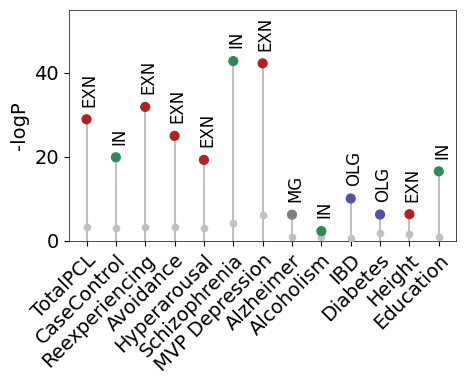

In [44]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']='14'
plt.rcParams['axes.linewidth'] = 0.5

plt.figure(figsize=(5,3))
plt.vlines(np.arange(len(conditions)), ymin=0, ymax=final['Bulk'].values,color='silver')
plt.vlines(np.arange(len(conditions)), ymin=final['Bulk'].values, ymax=final['Single cell'].values,color='silver')
plt.scatter(np.arange(len(conditions)), final['Bulk'].values, facecolor='silver', edgecolor='silver',s=20,zorder=3)

plt.scatter(np.arange(len(conditions)), final['Single cell'].values, color=[celltype_colors2[x] for x in final['celltype'].values],zorder=3,s=40)
plt.xticks(np.arange(len(conditions)),final.index.values,rotation=45,ha='right',rotation_mode='anchor')

#bulk = matplotlib.lines.Line2D([], [], label='Bulk', marker='o', markersize=5, markeredgecolor='gray', markerfacecolor='white',linestyle='')
#sc = matplotlib.lines.Line2D([], [], label='Single cell', marker='o', markersize=8, markeredgecolor='#d6616b', markerfacecolor='#d6616b',linestyle='--')

for ii,c in enumerate(final.celltype.values):
    plt.text(ii-0.2,final['Single cell'][ii]+4,c,rotation=90,fontsize=12)
    
plt.ylabel('-logP')
plt.ylim([0,55])